In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale

In [33]:
df = pd.read_csv('datasets/diabetes.csv')

In [34]:
outcome = df['Outcome']

df = df.drop(['Outcome'], axis = 1)

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### The Rotate argument
The rotation angle for the X labels can be set with the 'rot' property

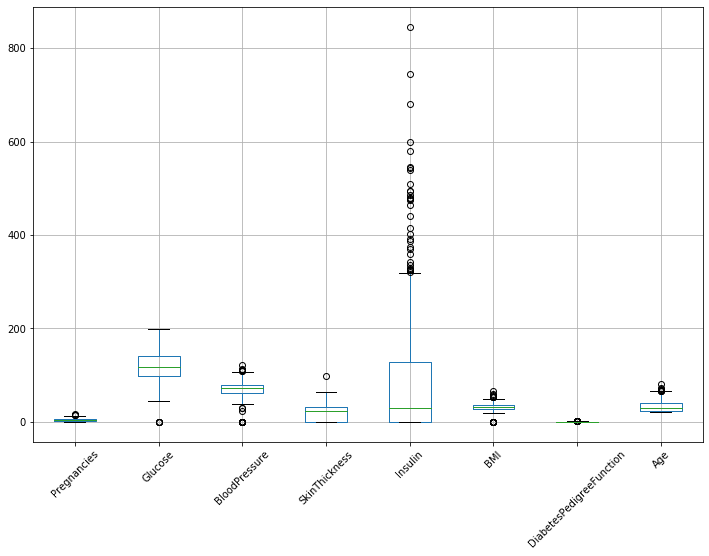

In [36]:
df.boxplot(figsize=(12, 8), rot=45)

plt.show()

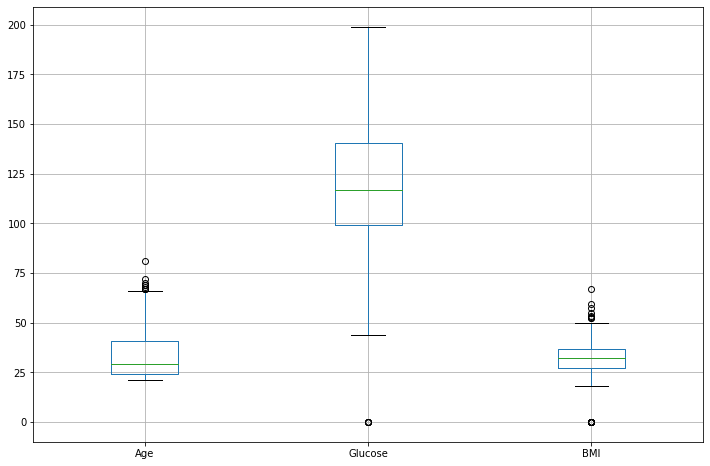

In [37]:
df.boxplot(column=['Age', 'Glucose','BMI'], figsize=(12, 8))

plt.show()

### Manually standardizing the data
Standardizing involves expressing each data point in terms of the number of standard deviations from the mean

In [38]:
manually_scaled_df = pd.DataFrame()

In [39]:
manually_scaled_df['Age'] = (df['Age'] - np.mean(df['Age'].values)) / \
                             np.std(df['Age'].values)

manually_scaled_df['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values)) / \
                                 np.std(df['Glucose'].values)

manually_scaled_df['BMI'] = (df['BMI']- np.mean(df['BMI'].values)) / \
                             np.std(df['BMI'].values)

In [40]:
manually_scaled_df.head()

,Age,Glucose,BMI
0,1.425995,0.848324,0.204013
1,-0.190672,-1.123396,-0.684422
2,-0.105584,1.943724,-1.103255
3,-1.041549,-0.998208,-0.494043
4,-0.020496,0.504055,1.409746


#### Standarized data
With a zero mean and unit standard deviation

In [41]:
manually_scaled_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.857600e-16,3.614007e-18,2.295979e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


#### Boxes in the box plot are now in the same scale
Each of the three boxes are centered around zero

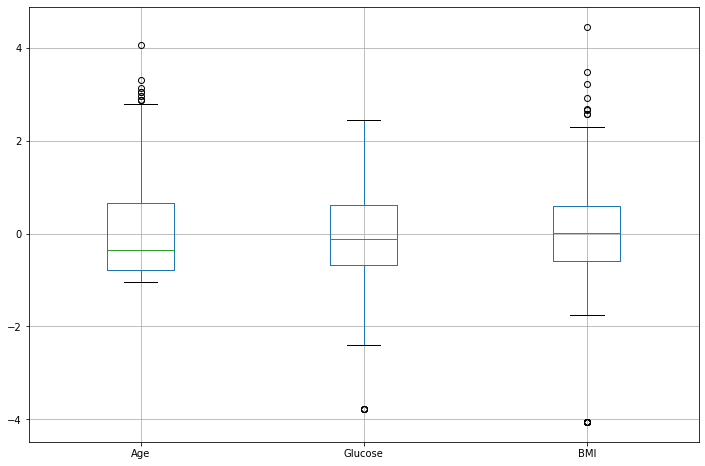

In [42]:
manually_scaled_df.boxplot(column=['Age', 'Glucose','BMI'], figsize=(12, 8))

plt.show()

### Using Scikit-learn to scale the data
Use the scale function in the scikit-learn preprocessing library to scale the columns. The effects are the same as manual scaling

In [43]:
scaled_df = pd.DataFrame()

scaled_df['Glucose'] = scale(df['Glucose'])
scaled_df['BMI'] = scale(df['BMI'])
scaled_df['Age'] = scale(df['Age'])

In [44]:
scaled_df.describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


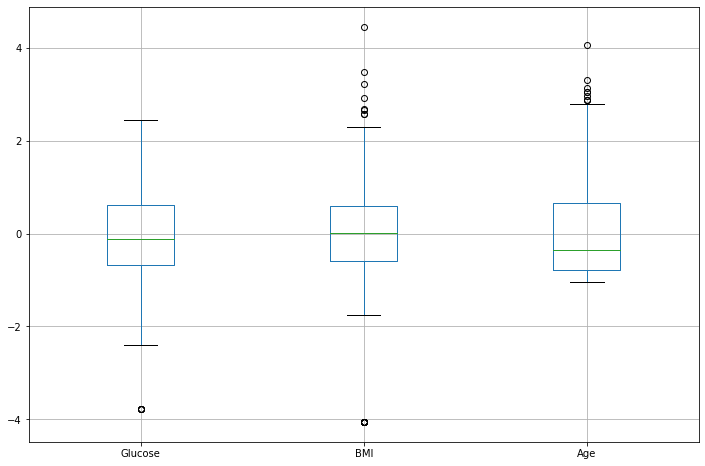

In [45]:
scaled_df.boxplot(figsize=(12, 8))

plt.show()

#### Scale the entire dataframe
It only contains the features at this point since the Outcome column was dropped

In [46]:
scaled_array = scale(df)

In [47]:
type(scaled_array)

numpy.ndarray

In [48]:
scaled_array.shape

(768, 8)

In [49]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [50]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


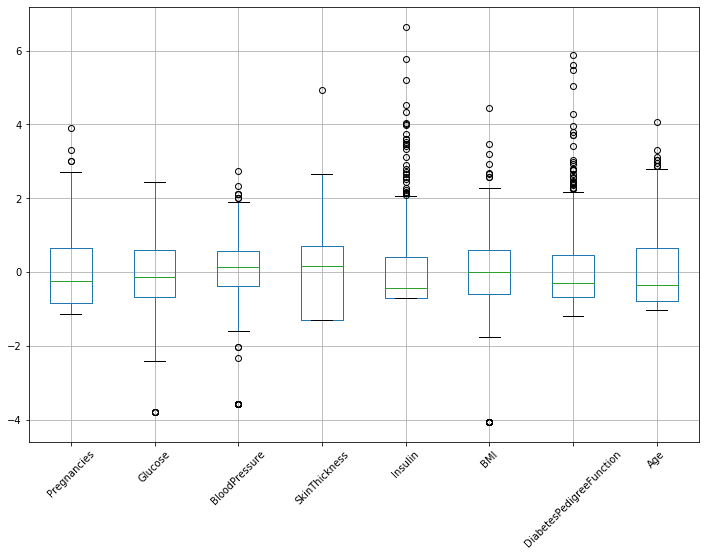

In [51]:
scaled_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

#### Customizing the scale operation
The parameters for the scale function are: <br />
* with_mean: True by default where mean is set to zero before scaling (When False, variance/std will still be set to 1)
* with_std: True by default where std and variance are set to 1. False will imply mean is zero but std is not scaled
* copy: True by default where scaling is done on a copy of data as opposed to in-place scaling

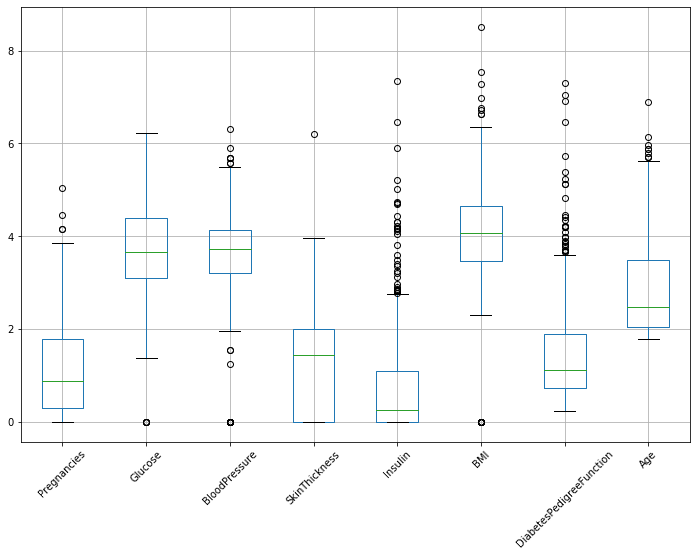

In [52]:
scaled_df = pd.DataFrame(scale(df, with_mean=False), 
                         columns=df.columns)

scaled_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

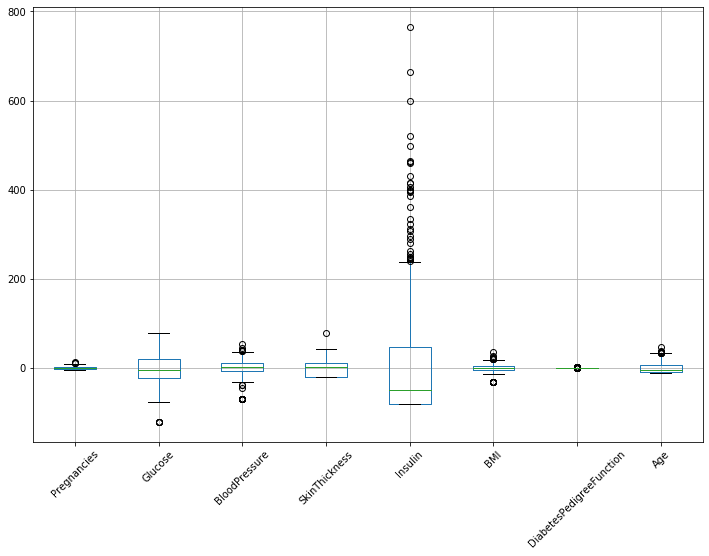

In [53]:
scaled_df = pd.DataFrame(scale(df, with_std=False), 
                         columns=df.columns)

scaled_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

#### The StandardScaler utility class
The scale() function is a quick way to scale data, but the StandardScaler utility class includes that plus other useful functions

In [54]:
std_scaler = StandardScaler(copy=True, 
                            with_mean=True, 
                            with_std=True)

#### The fit_transform method
A combination of fit and transform

In [55]:
scaled_array = std_scaler.fit_transform(df)

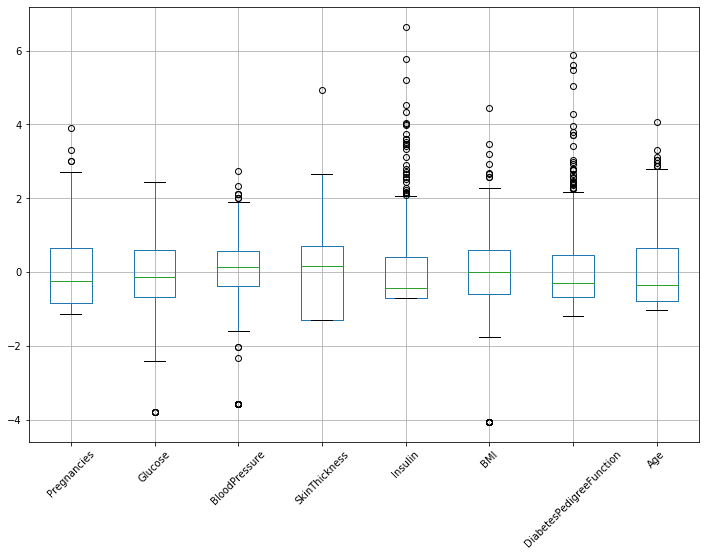

In [56]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

#### Retrieve statistics for each column from the StandardScaler

In [57]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [58]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

#### the scale_ property
Returns the square root of variance (STD)

In [59]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

#### Number of samples seen
The number of samples processed by the estimator for each feature. If there are not missing samples, the n_samples_seen will be an integer, otherwise it will be an array

In [60]:
std_scaler.n_samples_seen_

768

#### Save processed dataset
This standard scaled dataset can be saved and will be used to build a model later on

In [61]:
scaled_df['Outcome'] = outcome

In [62]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [63]:
scaled_df.to_csv('datasets/diabetes_processed.csv', 
                 index=False)

In [64]:
!ls datasets

A_Z Handwritten Data.csv         koala.jpg
Analyst_Forecasts.csv            sarcasm_headlines.json
boat-types-recognition           sarcasm_headlines_sample.json
diabetes.csv                     store_visits.csv
diabetes_processed.csv           student_performance.csv
headbrain.csv                    student_performance_modified.csv
interstellar_plot.txt
